<a href="https://colab.research.google.com/github/Adil1979/P6_Tag_Recommendation_Stackoverflow/blob/master/03_Unsupervised_modelisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet6: Catégorisation automatique de questions**

## **1.Librairies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib as mpl
#import chart_studio.plotly.plotly as py
from collections import Counter
#import plotly.plotly as py
import seaborn as sns
import datetime as dt
import calendar as cld
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from os import listdir
import glob
import missingno as msno
#from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.decomposition import PCA
from matplotlib import dates
import nltk
import re
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer 
import string
from collections import Counter
from bs4 import BeautifulSoup
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import Word2Vec 
random_state = 747

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [3]:
!pip install pyLDAvis==2.1.2

## **2.Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
questions = pd.read_csv('/content/drive/MyDrive/CentraleSupelec_OCR/P6/questions1.csv')
questions = questions.iloc[:, 1:]

tags = pd.read_csv('/content/drive/MyDrive/CentraleSupelec_OCR/P6/tags.csv')
tags = tags.iloc[:, 1:]

In [6]:
questions

,Question
0,pandas pandas list dataframe object
1,php string
2,json performance json function select json joi...
3,java java class class static string join join ...
4,stream video browser stream video browser vide...
...,...
39995,scala scala configuration module java scala ty...
39996,flutter function button build function function
39997,routing url browser class import dom class con...
39998,python post twitter post python import import ...


In [7]:
tags

,Tag_st
0,python pandas
1,php
2,performance postgresql
3,java multithreading
4,flash video stream
...,...
39995,scala intellij-idea
39996,dart flutter
39997,reactjs webpack redux
39998,python twitter


## **2.1.String to List**

In [8]:
questions['Question'] = questions['Question'].apply(lambda text: str(text).split())
tags['Tag_st'] = tags['Tag_st'].apply(lambda text: str(text).split())

In [9]:
questions = questions['Question'] 
questions.head(10)

0            [pandas, pandas, list, dataframe, object]
1                                        [php, string]
2    [json, performance, json, function, select, js...
3    [java, java, class, class, static, string, joi...
4    [stream, video, browser, stream, video, browse...
5    [pandas, pandas, date, indexing, date, date, d...
6                                           [dns, php]
7    [php, ide, constants, reflection, web, php, ph...
8                                            [process]
9    [jquery, javascript, jquery, javascript, jquer...
Name: Question, dtype: object

In [10]:
tags = tags['Tag_st'] 
tags.head(10)

0             [python, pandas]
1                        [php]
2    [performance, postgresql]
3       [java, multithreading]
4       [flash, video, stream]
5                     [pandas]
6            [php, mysql, dns]
7                        [php]
8           [ios, objective-c]
9         [javascript, jquery]
Name: Tag_st, dtype: object

## **3.Modelization LDA**

## **3.1.Dictionary, Indexation and frequency of words by question**

In [11]:
from gensim import corpora
dictionary = corpora.Dictionary(questions)
corpus = [dictionary.doc2bow(text) for text in questions]

In [12]:
len(dictionary)

358

In [13]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 2)],
 [(4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 5), (10, 2), (11, 1), (12, 1), (13, 1), (14, 6)],
 [(5, 1), (8, 2), (15, 4), (16, 1), (17, 4), (18, 1), (19, 1), (20, 1)],
 [(21, 3),
  (22, 2),
  (23, 5),
  (24, 3),
  (25, 1),
  (26, 1),
  (27, 11),
  (28, 6),
  (29, 1)],
 [(3, 2), (6, 4), (30, 1)],
 [(4, 1), (31, 1)],
 [(4, 5),
  (7, 1),
  (15, 1),
  (29, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2)],
 [(38, 1)],
 [(7, 1), (26, 2), (39, 3)],
 [(40, 1)],
 [(13, 1), (41, 1), (42, 1)],
 [(9, 3), (14, 1), (43, 1), (44, 1), (45, 1)],
 [(25, 1), (32, 2)],
 [(14, 1), (41, 4), (46, 3), (47, 4)],
 [(2, 1)],
 [(15, 2), (21, 1), (29, 1), (48, 1), (49, 1), (50, 1), (51, 2)],
 [(5, 1), (15, 1), (17, 6), (43, 3), (52, 2)],
 [(2, 3),
  (3, 2),
  (5, 4),
  (6, 2),
  (13, 4),
  (14, 1),
  (16, 1),
  (22, 16),
  (42, 1),
  (53, 2),
  (54, 2),
  (55, 1),
  (56, 2),
  (57, 22),
  (58, 3),
  (59, 12),
  (60, 1),
  (61, 3),
  (62, 1)],
 [(1, 1), (6

In [14]:
len(corpus)

40000

In [15]:
print(dictionary.get(0))
print(dictionary.get(3))
print(dictionary.get(15))

dataframe
pandas
class


## **3.2.Optimal number of topics**

In [17]:
from gensim.models import CoherenceModel

### **Coherence score according to the number of topics** 

In [18]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_values =[]
  model_list = []
  for num_topics in range(start, limit, step):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
  return model_list, coherence_values

In [27]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=questions, start=2, limit=40, step=2) 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin ins

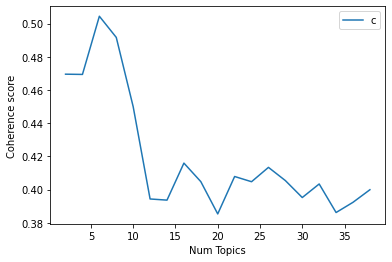

In [28]:
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### **Optimal number of topics = 6**

In [29]:
for nt, cs in zip(x, coherence_values):
  print("Num Topics =", nt, "is having Coherence score of", round(cs, 4))

Num Topics = 2 is having Coherence score of 0.4695
Num Topics = 4 is having Coherence score of 0.4694
Num Topics = 6 is having Coherence score of 0.5045
Num Topics = 8 is having Coherence score of 0.4917
Num Topics = 10 is having Coherence score of 0.4499
Num Topics = 12 is having Coherence score of 0.3943
Num Topics = 14 is having Coherence score of 0.3936
Num Topics = 16 is having Coherence score of 0.4159
Num Topics = 18 is having Coherence score of 0.4048
Num Topics = 20 is having Coherence score of 0.3853
Num Topics = 22 is having Coherence score of 0.4079
Num Topics = 24 is having Coherence score of 0.4047
Num Topics = 26 is having Coherence score of 0.4134
Num Topics = 28 is having Coherence score of 0.4054
Num Topics = 30 is having Coherence score of 0.3952
Num Topics = 32 is having Coherence score of 0.4034
Num Topics = 34 is having Coherence score of 0.3861
Num Topics = 36 is having Coherence score of 0.3923
Num Topics = 38 is having Coherence score of 0.3999


In [30]:
lda = gensim.models.ldamodel.LdaModel

## **3.3.LDA with 6 topics**

In [31]:
ldamodel = lda(corpus, num_topics=6, id2word = dictionary, passes=50)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin ins

### **keywords and weights**

In [32]:
#print("LDA model is: \n", ldamodel.print_topics(num_topics=8, num_words=10))
print("LDA model is: \n")
for idx, topic in ldamodel.print_topics(num_topics=6, num_words=5):
    print("Topic: {} \nTags: {}".format(idx, topic))
    #print("\n")

LDA model is: 

Topic: 0 
Tags: 0.166*"class" + 0.132*"string" + 0.070*"list" + 0.058*"object" + 0.055*"null"
Topic: 1 
Tags: 0.216*"function" + 0.115*"import" + 0.077*"input" + 0.069*"php" + 0.053*"module"
Topic: 2 
Tags: 0.267*"android" + 0.166*"text" + 0.104*"image" + 0.087*"button" + 0.075*"layout"
Topic: 3 
Tags: 0.134*"file" + 0.060*"html" + 0.056*"url" + 0.045*"path" + 0.045*"json"
Topic: 4 
Tags: 0.279*"java" + 0.054*"service" + 0.051*"build" + 0.035*"spring" + 0.035*"apache"
Topic: 5 
Tags: 0.186*"c" + 0.069*"python" + 0.065*"time" + 0.061*"file" + 0.052*"r"


### **Creation of label tags**

In [33]:
def main_topics(model=ldamodel, corpus=corpus, questions=questions, tags=tags):

  #Output Initialization
  topics_df = pd.DataFrame()

  #Main topic  for each question
  for i, row in enumerate(model[corpus]):

    #row
    row = sorted(row, key=lambda x: (x[1]), reverse=True)

    #Main topic, Importance, Keywords for each question
    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0: #Main topic
        wp = model.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        topics_df = topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break
  topics_df.columns = ['Main_Topic', 'Importance', 'Topic_Keywords']

  #Concatenate questions, topic outputs and true tags
  contents = pd.Series(questions)
  tags = pd.Series(tags)
  topics_df = pd.concat([topics_df, contents, tags], axis=1)
  return(topics_df)

df_topic_keywords = main_topics(model=ldamodel, corpus=corpus, questions=questions, tags=tags)

df_dominant_topic = df_topic_keywords.reset_index()
df_dominant_topic.columns =  ['Question_No', 'Main_Topic', 'Importance', 'Tags_pred', 'Question', 'Tags_True'] 


In [34]:
def remove_space(body):
  return ''.join(str(body).split())

In [35]:
df_dominant_topic['Tags_pred'] = df_dominant_topic['Tags_pred'].apply(remove_space)

In [36]:
df_dominant_topic['Tags_pred'] = df_dominant_topic['Tags_pred'].apply(lambda text: str(text).split())

In [37]:
df_dominant_topic.head(100)

,Question_No,Main_Topic,Importance,Tags_pred,Question,Tags_True
0,0,5.0,0.5533,"[c,python,time,file,r,windows,process,c++,memo...","[pandas, pandas, list, dataframe, object]","[python, pandas]"
1,1,1.0,0.3889,"[function,import,input,php,module,jquery,git,a...","[php, string]",[php]
2,2,5.0,0.4129,"[c,python,time,file,r,windows,process,c++,memo...","[json, performance, json, function, select, js...","[performance, postgresql]"
3,3,0.0,0.5201,"[class,string,list,object,null,set,select,mode...","[java, java, class, class, static, string, joi...","[java, multithreading]"
4,4,3.0,0.8608,"[file,html,url,path,json,web,api,post,http,css]","[stream, video, browser, stream, video, browse...","[flash, video, stream]"
...,...,...,...,...,...,...
95,95,0.0,0.7191,"[class,string,list,object,null,set,select,mode...","[spring, spring, migration, spring, class, sta...","[java, spring, mongodb, spring-boot]"
96,96,5.0,0.7639,"[c,python,time,file,r,windows,process,c++,memo...","[algorithm, numpy, scipy, algorithm, scipy, nu...","[python, algorithm, numpy, scipy]"
97,97,0.0,0.5801,"[class,string,list,object,null,set,select,mode...","[service, service, list, service, list, list, ...","[c#, asp.net-core, dependency-injection, .net-..."
98,98,0.0,0.7462,"[class,string,list,object,null,set,select,mode...","[grails, mongodb, grails, mongodb, set, groovy...","[mongodb, grails]"


In [38]:
df_tags = df_dominant_topic[['Tags_True', 'Tags_pred']]
df_tags

,Tags_True,Tags_pred
0,"[python, pandas]","[c,python,time,file,r,windows,process,c++,memo..."
1,[php],"[function,import,input,php,module,jquery,git,a..."
2,"[performance, postgresql]","[c,python,time,file,r,windows,process,c++,memo..."
3,"[java, multithreading]","[class,string,list,object,null,set,select,mode..."
4,"[flash, video, stream]","[file,html,url,path,json,web,api,post,http,css]"
...,...,...
39995,"[scala, intellij-idea]","[java,service,build,spring,apache,exception,gr..."
39996,"[dart, flutter]","[function,import,input,php,module,jquery,git,a..."
39997,"[reactjs, webpack, redux]","[function,import,input,php,module,jquery,git,a..."
39998,"[python, twitter]","[file,html,url,path,json,web,api,post,http,css]"


### **jaccard similarity scor**

In [39]:
from sklearn.externals import joblib
from joblib import load, dump

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [40]:
dict_tags_500 = joblib.load('/content/drive/My Drive/CentraleSupelec_OCR/P6/list_tag_key_500.joblib')
print(dict_tags_500)

{'devise', 'jakarta-ee', 'assembly', 'ruby-on-rails', 'keras', 'azure', 'encoding', 'msbuild', 'file', 'c++11', 'actionscript-3', 'session', 'uwp', 'mobile', 'compiler-construction', 'javafx', 'xslt', 'asp.net-mvc-4', 'jenkins', 'asp.net-core-2.0', 'docker', 'haskell', 'formatting', 'c', 'coldfusion', 'web-services', 'recursion', 'model', 'dictionary', 'visual-studio-2017', 'json', 'scikit-learn', 'architecture', 'sqlite', 'parallel-processing', 'asp.net-core', 'silverlight', 'matlab', 'magento', 'text', 'java', 'asp.net-mvc-2', 'lisp', 'encryption', 'postgresql', 'react-native', 'select', 'linq', 'refactoring', 'jdbc', 'spring', 'jpa', 'svn', 'object', 'email', 'ssl', 'cocoa', 'authentication', 'reactjs', 'memory', 'database-design', 'flash', 'stored-procedures', 'graphics', 'filesystems', 'constructor', 'nginx', 'tomcat', 'csv', 'apache-kafka', 'tkinter', 'hadoop', 'windows-7', 'null', 'multidimensional-array', 'google-api', 'stream', 'async-await', 'android', 'android-gradle-plugin'

In [41]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=sorted(dict_tags_500))
df_tags_num_true = mlb.fit_transform(df_tags['Tags_True'])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) ['nan'] will be ignored
  .format(sorted(unknown, key=str)))


In [42]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=sorted(dict_tags_500 ))
df_tags_num_pred = mlb.fit_transform(df_tags['Tags_pred'])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) ['android,text,image,button,layout,xml,r,firebase,binding,scroll', 'c,python,time,file,r,windows,process,c++,memory,set', 'class,string,list,object,null,set,select,model,database,date', 'file,html,url,path,json,web,api,post,http,css', 'function,import,input,php,module,jquery,git,angular,javascript,webpack', 'java,service,build,spring,apache,exception,gradle,xml,io,configuration'] will be ignored
  .format(sorted(unknown, key=str)))


In [43]:
from sklearn.metrics import jaccard_score, make_scorer, jaccard_similarity_score
from gensim.matutils import jaccard

In [44]:
lda_jss_score = jaccard_similarity_score(df_tags_num_true, df_tags_num_pred)
print(f"Score: {lda_jss_score}")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Score: 0.057375


In [45]:
import pyLDAvis
import pyLDAvis.gensim

In [46]:
lda_visualisation = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_visualisation)

## **4.Word Embedding (Optional)**

In [47]:
wordvec = Word2Vec(questions, min_count=1)

In [48]:
print('wordvec:', wordvec)

wordvec: Word2Vec(vocab=358, size=100, alpha=0.025)


In [49]:
words = list(wordvec.wv.vocab)

In [50]:
print("\nwords", words)


words ['pandas', 'list', 'dataframe', 'object', 'php', 'string', 'json', 'performance', 'function', 'select', 'join', 'date', 'time', 'loops', 'set', 'java', 'class', 'static', 'security', 'exception', 'jvm', 'stream', 'video', 'browser', 'flash', 'http', 'file', 'javascript', 'input', 'web', 'indexing', 'dns', 'ide', 'constants', 'reflection', 'c', 'c++', 'methods', 'process', 'jquery', 'nan', 'linux', 'database', 'caching', 'reference', 'api', 'mysql', 'text', 'button', 'selenium', 'firefox', 'r', 'null', 'import', 'module', 'python', 'post', 'pip', 'build', 'search', 'regex', 'path', 'sql', 'memory', 'bash', 'curl', 'gcc', 'terminal', 'apache', 'hadoop', 'shell', 'spring', 'xcode', 'image', 'configuration', 'angular', 'email', 'constructor', 'tkinter', 'dynamic', 'variables', 'haskell', 'parameters', 'integer', 'android', 'dom', 'html', 'model', 'hibernate', 'github', 'wpf', 'xml', 'url', 'hash', 'pointers', 'session', 'redirect', 'windows', 'ruby', 'rspec', 'scala', 'sorting', 'la

In [51]:
print("\nwordvec['function'] :", wordvec['function'])


wordvec['function'] : [-1.3535756  -0.8204511   0.68864733 -0.16536057  0.00223879  0.78682876
 -0.24000445  0.9216206  -0.18961848 -0.70993924 -0.80165666  1.4962957
 -0.98293     0.76356894  0.1733149   0.90402     0.07002867 -0.8486991
  0.15374473 -0.75717604 -0.2819633  -0.0144824  -1.0097573   1.2801421
 -0.64327174  0.8767355  -0.36254895 -0.36250913  0.05994253  0.18625757
 -0.46296918  0.46520585  0.25016987  0.34849885 -0.26926696 -0.93819094
 -0.7142148  -0.75789624  0.7697302  -1.2534705   1.1334008  -0.40228906
  0.08499686  0.43784386 -0.03546901  0.75041837 -0.4228739  -0.8731852
 -0.5685059  -1.1262896   1.0142959  -0.8630402  -0.5926528  -0.09314094
  0.11164702  0.815288    0.42165363 -0.12137885 -0.34120116  0.35731724
 -0.04432664 -0.28375757 -0.3588576  -0.2955608  -0.7711969   0.48777926
  0.05904024 -0.5902171  -0.30408707 -0.44318113 -0.19449243  1.6905779
  0.6805388  -0.07980315  0.17398508 -0.23699121 -0.69216603 -0.83482474
  1.0233809  -0.12098429 -1.13371

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [52]:
wordvec.save('wordvec.bin')

/usr/local/lib/python3.7/dist-packages/gensim/utils.py:589: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  if hasattr(self, attrib):
/usr/local/lib/python3.7/dist-packages/gensim/utils.py:590: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  asides[attrib] = getattr(self, attrib)
/usr/local/lib/python3.7/dist-packages/gensim/utils.py:591: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  delattr(self, attrib)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/gensim/

In [53]:
new_wordvec = Word2Vec.load('wordvec.bin')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/gensim/utils.py:488: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  setattr(self, attrib, None)


In [54]:
print("\nloaded wordvec", new_wordvec)


loaded wordvec Word2Vec(vocab=358, size=100, alpha=0.025)


In [55]:
#from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot

In [56]:
X = wordvec[wordvec.wv.vocab]
#pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
result = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the nump

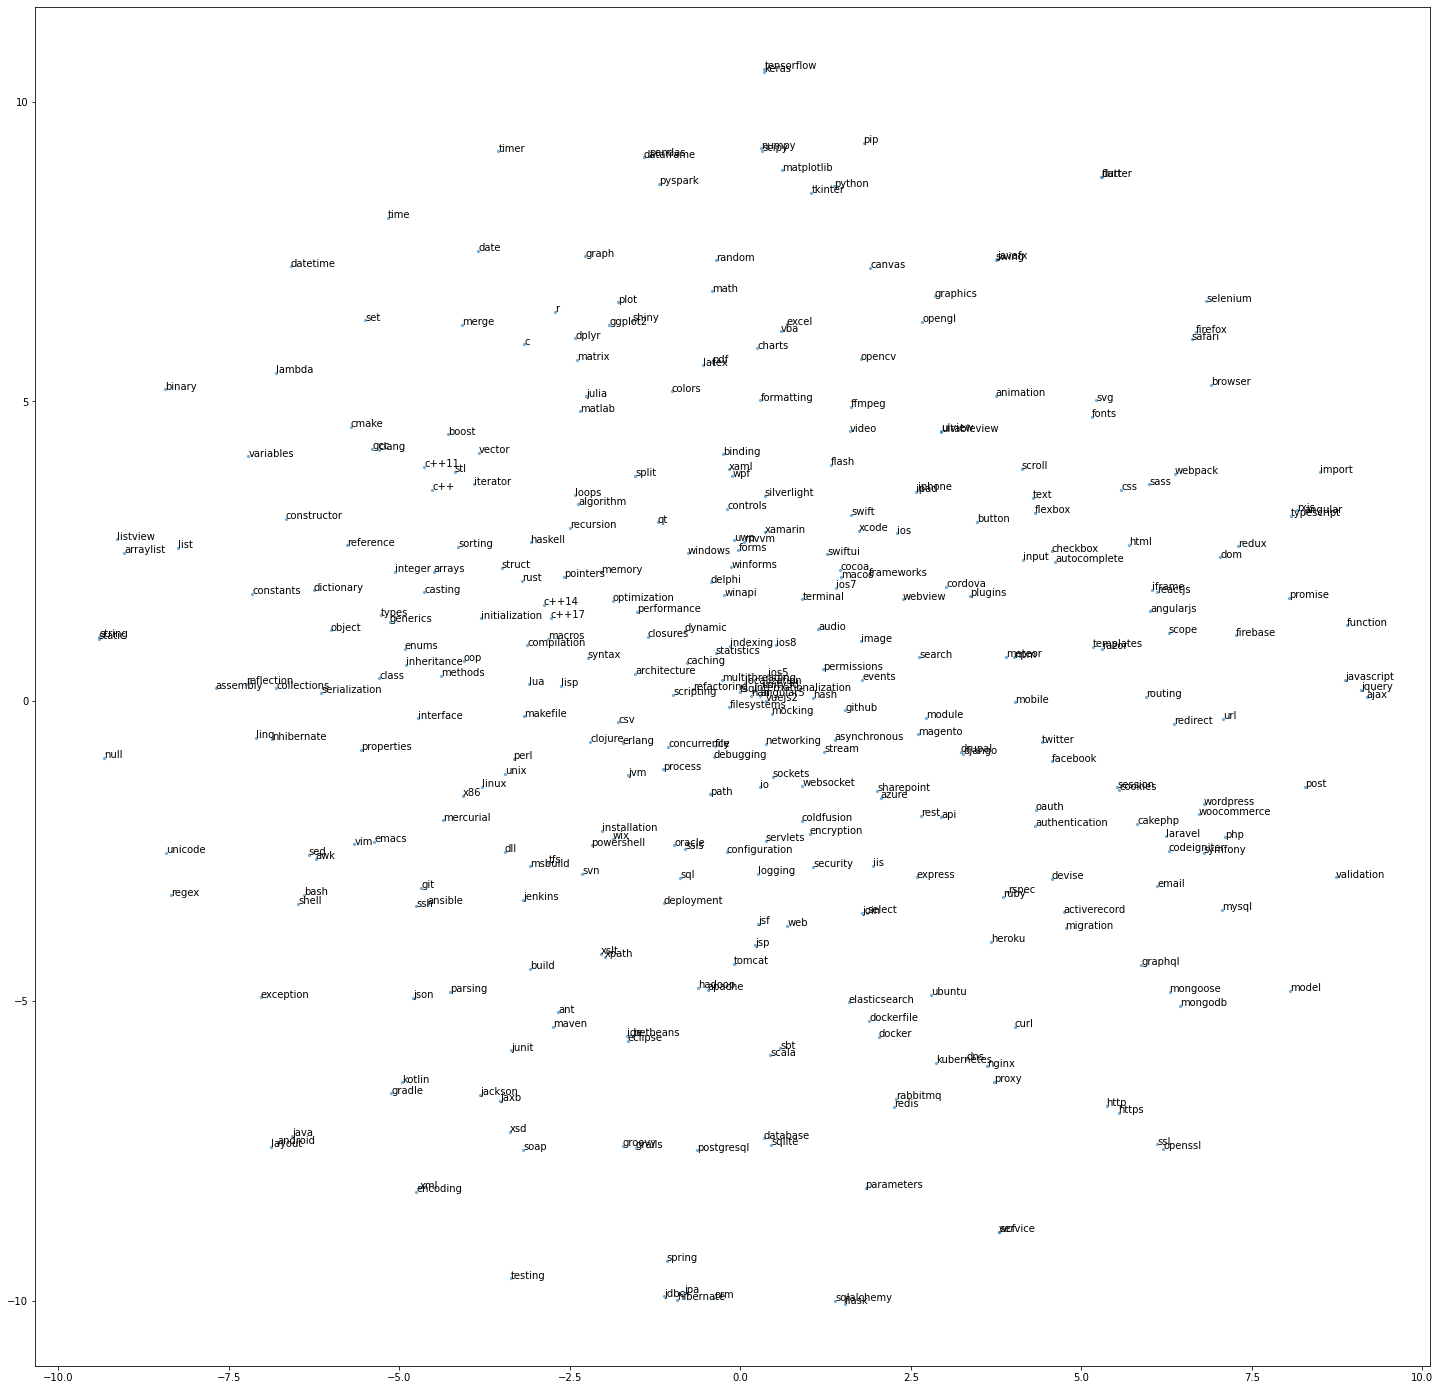

In [57]:
plt.figure(figsize=(25,25))
pyplot.scatter(result[:, 0], result[:, 1], s=5, alpha=0.5)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()